##Name: Abraham Lungguh Prayoga##
#### Objective: Image Classification of rock, paper, scissors ####


Check point:
1. Dataset harus dibagi menjadi train set dan validation set.
2. Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
3. Harus mengimplementasikan augmentasi gambar.
4. Menggunakan image data generator.
5. Model harus menggunakan model sequential.
6. Pelatihan model tidak melebihi waktu 30 menit.
7. Program dikerjakan pada Google Colaboratory.
8. Dapat memprediksi gambar yang diunggah ke Colab
9. Akurasi diatas 96%
10. Gunakan >3 teknik di luar modul

Langkah-langkah:

1.   Data Collecting (download & extract) 
2.   Data Preprocessing 
      *   Dataset split
      *   Data Augmentation
3.   Build basic sequential model
      *   Preparation (Create Callback & Visual Function)
      *   Create Basic Model with CNN
4.   Model Fitting, Visualize 
5.   Create Improved Model: Transfer Learning using MobileNetV2
5.   Testing model with our photo




## Data Collecting ##

In [1]:
# Data collecting (download from link)
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2021-05-27 13:19:55--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M   896KB/s    in 6m 26s  

2021-05-27 13:26:22 (817 KB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# lakukan ekstraksi file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# definisi nama direktori untuk train dan valid
base_dir = '/tmp/rockpaperscissors' 
os.listdir(base_dir)

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [3]:
# cek apakah data pada folder rps-cv sama dengan paper
print(os.listdir(base_dir + '/paper') == os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper'))

True


In [4]:
# cek distribusi data untuk setiap class
print("jumlah data rock:" , len(os.listdir('/tmp/rockpaperscissors/rock' )))
print("jumlah data paper:" , len(os.listdir('/tmp/rockpaperscissors/paper' )))
print("jumlah data scissors:" , len(os.listdir('/tmp/rockpaperscissors/scissors' )))

jumlah data rock: 726
jumlah data paper: 712
jumlah data scissors: 750


## Data Split ##

In [5]:
# membuat path untuk data train dan val
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# membuat directory path baru tersebut
if not os.path.exists(train_dir):
  os.mkdir(train_dir) 
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

In [6]:
# data tersimpan dalam beberapa folder yang merepresentasikan tiap kelas
# kita akan coba split data untuk tiap kelas menjadi train dan val 
rock_dir = os.path.join(base_dir + '/rock')
paper_dir = os.path.join(base_dir + '/paper')
scissor_dir = os.path.join(base_dir + '/scissors')

from sklearn.model_selection import train_test_split
# membagi data sebesar 40% untuk validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissor_dir, val_scissor_dir = train_test_split(os.listdir(scissor_dir), test_size=0.4)

In [7]:
# membuat path untuk setiap kelas di train dan validation folder
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissor = os.path.join(train_dir, 'scissor')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissor = os.path.join(validation_dir, 'scissor')

In [8]:
# membuat direktori file untuk ke6 path
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissor):
  os.mkdir(train_scissor)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissor):
  os.mkdir(val_scissor)

In [9]:
# copy data train dan validation ke directory spesifik
import shutil

# copy data yang sudah dibagi ke directory nya masing"
# shtuli.copy(source, destination)
for o in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, o), os.path.join(train_rock, o))
for o in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, o), os.path.join(train_paper, o))
for o in train_scissor_dir:
    shutil.copy(os.path.join(scissor_dir, o), os.path.join(train_scissor, o)) 

for o in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, o), os.path.join(val_rock, o))
for o in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, o), os.path.join(val_paper, o))
for o in val_scissor_dir:
    shutil.copy(os.path.join(scissor_dir, o), os.path.join(val_scissor, o)) 

In [10]:
# cek jumlah data tiap direktori
print('train rock:' , len(os.listdir(train_rock)))
print('train paper:' , len(os.listdir(train_paper)))
print('train scissor:' , len(os.listdir(train_scissor)))
print('total data train :' , (len(os.listdir(train_rock)) + len(os.listdir(train_paper)) + len(os.listdir(train_scissor))))

print()
print('valid rock:' , len(os.listdir(val_rock)))
print('valid paper:' , len(os.listdir(val_paper)))
print('valid scissor:' , len(os.listdir(val_scissor)))
print('total data valid :' , (len(os.listdir(val_rock)) + len(os.listdir(val_paper)) + len(os.listdir(val_scissor))))

train rock: 435
train paper: 427
train scissor: 450
total data train : 1312

valid rock: 291
valid paper: 285
valid scissor: 300
total data valid : 876


## Data Augmentation ##

In [11]:
import tensorflow as tf

In [12]:
# menambahkan data dengan melakukan sedikit perubahan pada data yang sudah ada dengan
# adjust rotate, width shift, height shift, shear distorted, zoom level, horizontal flip
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest',
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    batch_size = 64,    
    class_mode = 'categorical'
)

valid_datagen = ImageDataGenerator(
    rescale = 1./255,
) 

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(100,150),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Implement Callback ## 

In [13]:
# mengurangi learning rate dan definisikan early stop akan mampu
# meningkatkan performa model jika metrics stagnan
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10, # number of epochs with no improvement after which learning rate will be reduced
    verbose=1,
    mode='auto',
    cooldown=1
)

# stop training, ketika metrics tidak improve
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001, 
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

## Visualization function to plot history ##

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# kita akan menyimpan history akurasi ketika training dan validasi
def accuracy_plot(history):
  accu = history.history['accuracy']
  val_accu = history.history['val_accuracy']
  epochs = range(len(accu))
  plt.subplot(1,2,1) # (size col, total col, position)
  acc_plot, = plt.plot(epochs, accu, 'r')
  val_acc_plot, = plt.plot(epochs, val_accu, 'g')
  plt.title('Train and Validation Accuracy per Epochs')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

# kita akan menyimpan history metrics loss ketika training dan validasi
def loss_plot(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plt.subplot(1,2,2)
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'g')
  plt.title('Train and Validation Loss per Epochs')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def plot_history(history):
  plt.figure(figsize=(15,7))
  accuracy_plot(history)
  loss_plot(history)

## Create Basic Sequential Model using CNN ##

In [15]:
tf.keras.backend.clear_session()

model_basic = tf.keras.models.Sequential([
                  tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(100,150,3)),
                  tf.keras.layers.MaxPooling2D(2,2),
                  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                  tf.keras.layers.MaxPooling2D(2,2),
                  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                  tf.keras.layers.MaxPooling2D(2,2),
                  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                  tf.keras.layers.MaxPooling2D(2,2),
                  tf.keras.layers.Flatten(),
                  tf.keras.layers.Dense(512, activation='relu'),
                  tf.keras.layers.Dense(3, activation='softmax')
])

model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        1

In [16]:
# karena output nya ada 3, kita gunakan categorical
# sebelum train, kita ubah run time accelerator menggunakan GPU
model_basic.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_basic = model_basic.fit(
    train_generator,
    epochs=70,
    callbacks=[reduce_lr, early_stop],
    verbose=1,
    validation_data=valid_generator
)

Epoch 1/70
21/21 [==============================] - 42s 2s/step - loss: 1.1049 - accuracy: 0.3316 - val_loss: 1.0859 - val_accuracy: 0.3265
Epoch 2/70
21/21 [==============================] - 40s 2s/step - loss: 1.0309 - accuracy: 0.4741 - val_loss: 0.6344 - val_accuracy: 0.8208
Epoch 3/70
21/21 [==============================] - 41s 2s/step - loss: 0.6087 - accuracy: 0.7569 - val_loss: 0.2677 - val_accuracy: 0.9543
Epoch 4/70
21/21 [==============================] - 41s 2s/step - loss: 0.4327 - accuracy: 0.8430 - val_loss: 0.2053 - val_accuracy: 0.9338
Epoch 5/70
21/21 [==============================] - 41s 2s/step - loss: 0.3290 - accuracy: 0.8780 - val_loss: 0.1967 - val_accuracy: 0.9384
Epoch 6/70
21/21 [==============================] - 41s 2s/step - loss: 0.3083 - accuracy: 0.8925 - val_loss: 0.1978 - val_accuracy: 0.9338
Epoch 7/70
21/21 [==============================] - 41s 2s/step - loss: 0.2485 - accuracy: 0.9146 - val_loss: 0.1539 - val_accuracy: 0.9589
Epoch 8/70
21/21 [==

## Visualize the history##

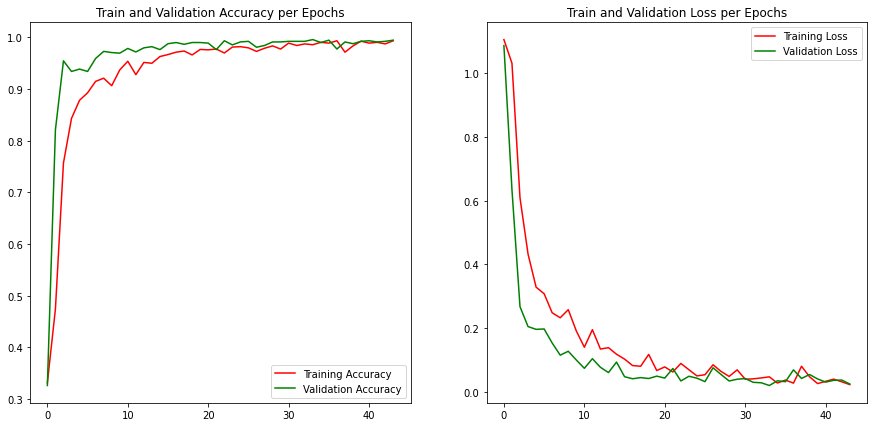

In [17]:
plot_history(history_basic)

## Using Transfer Learning for improvement ##

In [18]:
import tensorflow as tf

In [19]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
tf.keras.backend.clear_session()

model_mobile = tf.keras.models.Sequential([
      MobileNetV2(weights='imagenet', include_top=False, input_shape=(100, 150, 3), pooling='avg'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax'),
])

model_mobile.layers[0].trainable = False

model_mobile.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 2,915,395
Trainable params: 657,411
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
model_mobile.compile(
    optimizer='Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history_mobile = model_mobile.fit(
    train_generator,
    epochs=70,
    callbacks=[reduce_lr, early_stop],
    verbose=1,
    validation_data=valid_generator
)

Epoch 1/70
21/21 [==============================] - 30s 1s/step - loss: 0.8228 - accuracy: 0.7774 - val_loss: 0.0795 - val_accuracy: 0.9703
Epoch 2/70
21/21 [==============================] - 27s 1s/step - loss: 0.1522 - accuracy: 0.9444 - val_loss: 0.0858 - val_accuracy: 0.9703
Epoch 3/70
21/21 [==============================] - 26s 1s/step - loss: 0.0953 - accuracy: 0.9695 - val_loss: 0.0391 - val_accuracy: 0.9829
Epoch 4/70
21/21 [==============================] - 26s 1s/step - loss: 0.1054 - accuracy: 0.9642 - val_loss: 0.0402 - val_accuracy: 0.9852
Epoch 5/70
21/21 [==============================] - 28s 1s/step - loss: 0.0878 - accuracy: 0.9665 - val_loss: 0.0398 - val_accuracy: 0.9852
Epoch 6/70
21/21 [==============================] - 27s 1s/step - loss: 0.0913 - accuracy: 0.9649 - val_loss: 0.0304 - val_accuracy: 0.9886
Epoch 7/70
21/21 [==============================] - 27s 1s/step - loss: 0.0723 - accuracy: 0.9764 - val_loss: 0.0282 - val_accuracy: 0.9897
Epoch 8/70
21/21 [==

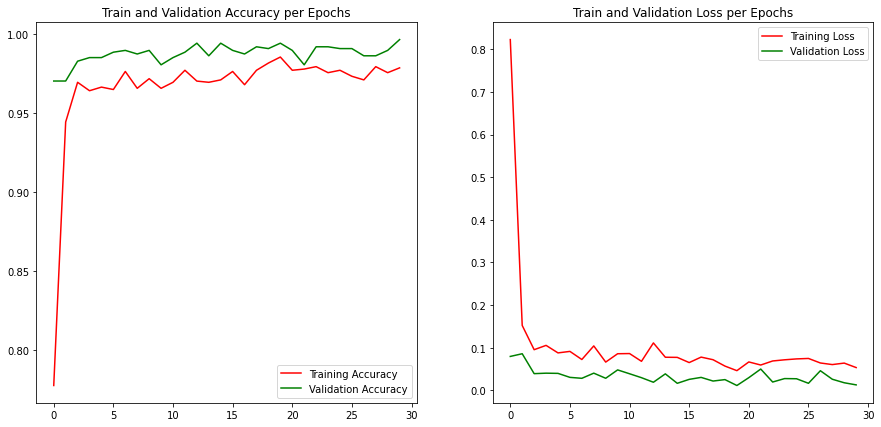

In [21]:
 plot_history(history_mobile)

## Making prediction using basic model ##



Saving batu_ijo.jpg to batu_ijo.jpg
batu_ijo.jpg
rock


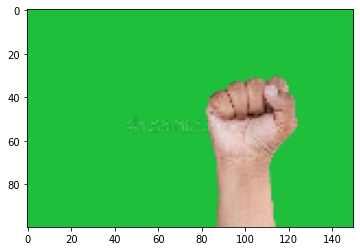

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)


  images = np.vstack([x])
  classs = model_basic.predict(images, batch_size=10)

  print(fn)
  # hasil bentuk matriks dengan 3 kolom (kertas, batu, gunting). Jika nilainya 1, maka itu
  # hasil prediksi 
  if classs[0][0] == 1:
    print('paper')
  elif classs[0][1] == 1:
    print('rock')
  elif classs[0][2] == 1:
    print('scissors')

## Making prediction using transfer learning ##

In [23]:
import pandas as pd

def predict_image(image_uplo, model=model_mobile):
  im = image_uplo
  im_array = np.asarray(im)
  im_array = im_array*(1/255)
  im_input = tf.reshape(im_array, shape=[1, 100, 150, 3])

  predict_array = model.predict(im_input)[0]

  predict_label = np.argmax(model.predict(im_input))

  if predict_label == 0:
    print('Paper')
  elif predict_label ==1:
    print('Rock')
  elif predict_label == 2:
    print('Scissor')



1st Try

Saving gunting.jpg to gunting (1).jpg
Scissor


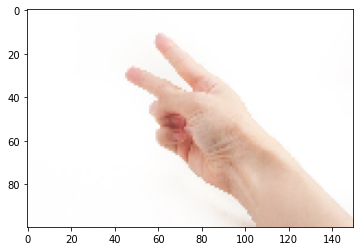

In [29]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])


  predict_image(img)

2nd try

Saving test_batu.jpg to test_batu.jpg
Paper


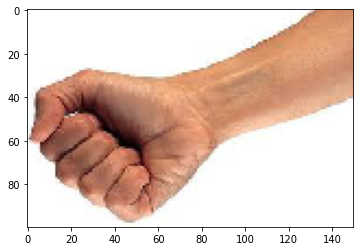

In [28]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])


  predict_image(img)

My model sometimes works poor when it comes to picture with no green background. Let's check how's the train and test image looks like. 

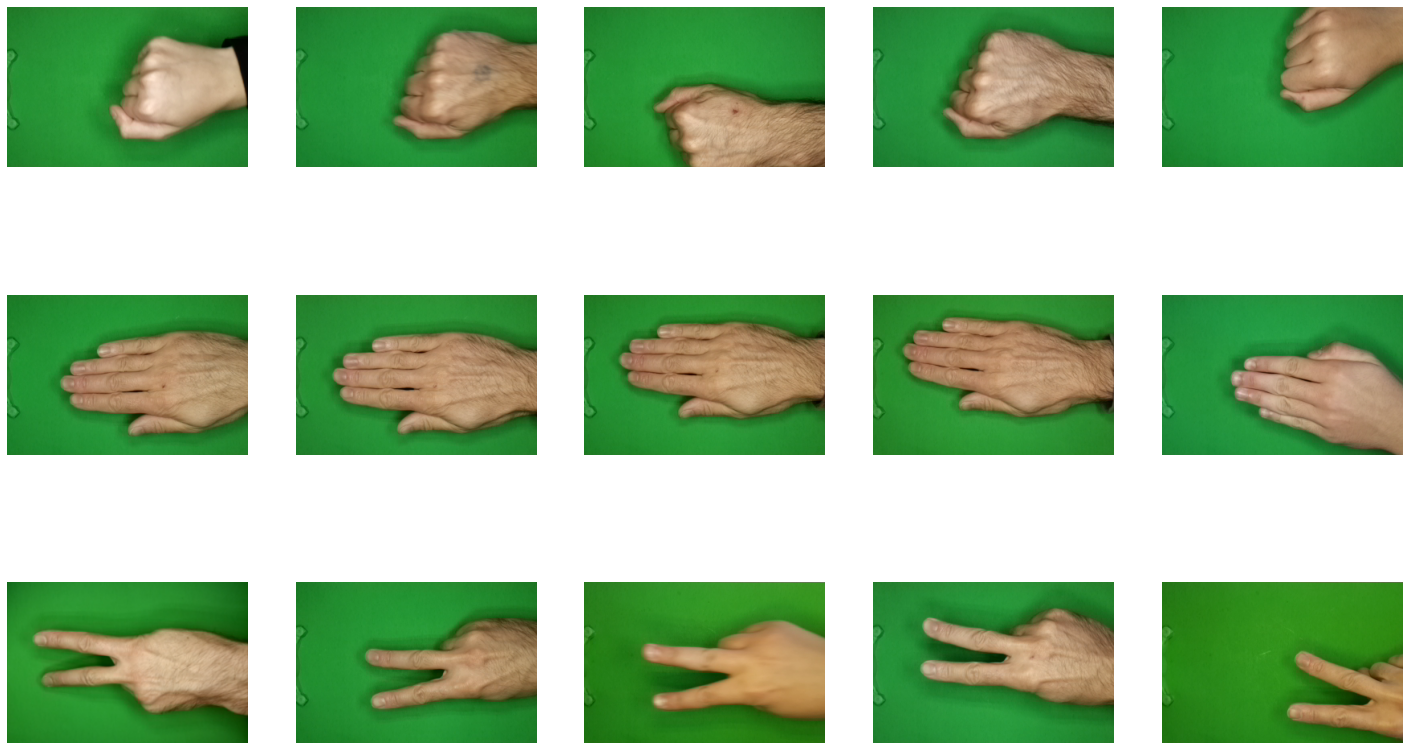

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# we take for only 5 first image of in 3 class in train
train_image_rock = [os.path.join(train_rock, o) for o in train_rock_dir][0:5]
train_image_paper = [os.path.join(train_paper, o) for o in train_paper_dir][0:5]
train_image_scissor = [os.path.join(train_scissor, o) for o in train_scissor_dir][0:5]

fig = plt.gcf()
row, col = 3,5
fig.set_size_inches(col*5, row*5)

for idx, img_path in enumerate(train_image_rock + train_image_paper + train_image_scissor ):
  sp = plt.subplot(row, col, idx+1) # start from index 1
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


All of my data has green background. And i think it's the issues that makes my model works poor in other background. Do you have any idea to tackle this? 